# Data Preparation for Modeling VIs in Tallgrass

## Importing Weather Data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
import pandas as pd

In [ ]:
file_path = 'Modeling VIs in Tallgrass/data/P13_Weather_Data.csv'
df = pd.read_csv(file_path)
df

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
0,2000,1,1,69.04,38.58,53.69,60.74,6.76,11.19,0.0,31.63,15.82,11.45,0.00,45.16,46.20,1.8101,1.5840,1.5508
1,2000,1,2,60.58,31.12,48.24,58.04,5.47,19.15,0.0,25.76,6.21,12.16,0.00,47.04,48.35,1.8401,1.5840,1.5464
2,2000,1,3,55.06,26.92,40.14,86.71,1.39,24.01,0.0,12.03,13.38,8.88,0.11,45.64,45.87,1.8145,1.5792,1.5420
3,2000,1,4,44.77,17.64,29.75,64.11,2.28,33.80,0.0,6.09,11.32,12.77,0.01,41.85,39.53,1.7812,1.5782,1.5392
4,2000,1,5,53.69,26.63,38.42,48.98,4.76,24.84,0.0,15.09,15.63,12.38,0.00,40.03,38.82,1.7900,1.5799,1.5392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,2023,10,27,72.72,45.19,54.04,76.54,3.14,6.05,0.0,40.30,14.71,11.98,0.00,64.96,64.08,1.5089,1.7333,3.3559
8701,2023,10,28,47.84,35.57,42.12,87.38,1.30,23.29,0.0,25.53,12.03,2.31,0.13,60.77,55.27,1.5181,1.6645,3.3526
8702,2023,10,29,36.15,32.26,34.54,90.14,0.68,30.80,0.0,20.31,17.69,1.62,0.93,54.15,47.10,1.5173,1.4824,3.3588
8703,2023,10,30,45.31,24.65,33.84,67.66,2.50,30.02,0.0,17.87,9.67,15.70,0.00,52.17,45.58,1.5252,1.4387,2.8545


## Cleaning Weather Data

In [ ]:
# Combining month, day, and year columns into a single DATE column
df['DATE'] = pd.to_datetime(df[['MONTH', 'DAY', 'YEAR']])
df.head()

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60,DATE
0,2000,1,1,69.04,38.58,53.69,60.74,6.76,11.19,0.0,31.63,15.82,11.45,0.00,45.16,46.20,1.8101,1.5840,1.5508,2000-01-01
1,2000,1,2,60.58,31.12,48.24,58.04,5.47,19.15,0.0,25.76,6.21,12.16,0.00,47.04,48.35,1.8401,1.5840,1.5464,2000-01-02
2,2000,1,3,55.06,26.92,40.14,86.71,1.39,24.01,0.0,12.03,13.38,8.88,0.11,45.64,45.87,1.8145,1.5792,1.5420,2000-01-03
3,2000,1,4,44.77,17.64,29.75,64.11,2.28,33.80,0.0,6.09,11.32,12.77,0.01,41.85,39.53,1.7812,1.5782,1.5392,2000-01-04
4,2000,1,5,53.69,26.63,38.42,48.98,4.76,24.84,0.0,15.09,15.63,12.38,0.00,40.03,38.82,1.7900,1.5799,1.5392,2000-01-05


In [ ]:
# Dropping unnecessary columns
df = df.drop(['YEAR', 'MONTH', 'DAY'], axis=1)

In [ ]:
# Arranging the columns
df = df[['DATE', 'TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WCMN', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60']]

In [ ]:
# Sorting the dataframe in ascending order based on date column
df.sort_values(by='DATE',ascending=True)

,DATE,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
0,2000-01-01,69.04,38.58,53.69,60.74,6.76,11.19,0.0,31.63,15.82,11.45,0.00,45.16,46.20,1.8101,1.5840,1.5508
1,2000-01-02,60.58,31.12,48.24,58.04,5.47,19.15,0.0,25.76,6.21,12.16,0.00,47.04,48.35,1.8401,1.5840,1.5464
2,2000-01-03,55.06,26.92,40.14,86.71,1.39,24.01,0.0,12.03,13.38,8.88,0.11,45.64,45.87,1.8145,1.5792,1.5420
3,2000-01-04,44.77,17.64,29.75,64.11,2.28,33.80,0.0,6.09,11.32,12.77,0.01,41.85,39.53,1.7812,1.5782,1.5392
4,2000-01-05,53.69,26.63,38.42,48.98,4.76,24.84,0.0,15.09,15.63,12.38,0.00,40.03,38.82,1.7900,1.5799,1.5392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,2023-10-27,72.72,45.19,54.04,76.54,3.14,6.05,0.0,40.30,14.71,11.98,0.00,64.96,64.08,1.5089,1.7333,3.3559
8701,2023-10-28,47.84,35.57,42.12,87.38,1.30,23.29,0.0,25.53,12.03,2.31,0.13,60.77,55.27,1.5181,1.6645,3.3526
8702,2023-10-29,36.15,32.26,34.54,90.14,0.68,30.80,0.0,20.31,17.69,1.62,0.93,54.15,47.10,1.5173,1.4824,3.3588
8703,2023-10-30,45.31,24.65,33.84,67.66,2.50,30.02,0.0,17.87,9.67,15.70,0.00,52.17,45.58,1.5252,1.4387,2.8545


In [ ]:
# Check for duplicates
duplicates = df.duplicated()

# Display rows that are duplicates
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [DATE, TMAX, TMIN, TAVG, HAVG, VDEF, HDEG, CDEG, WCMN, WSPD, ATOT, RAIN, SAVG, BAVG, TR05, TR25, TR60]
Index: []


In [ ]:
# -996 is a missing value. So, replaced all those missing values with NaN
import numpy as np
df = df.replace(-996, np.NaN)
# For rain column any value below 0 is treated as missing. So, replacing the missing values with NaN
df[df['RAIN'] < 0] = np.NaN

In [ ]:
# Checking for null values in each column
df.isnull().any()

DATE    True
TMAX    True
TMIN    True
TAVG    True
HAVG    True
VDEF    True
HDEG    True
CDEG    True
WCMN    True
WSPD    True
ATOT    True
RAIN    True
SAVG    True
BAVG    True
TR05    True
TR25    True
TR60    True
dtype: bool

In [ ]:
# Checking for missing values in each row
df[df.isnull().any(axis=1)]

,DATE,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WCMN,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
15,2000-01-16,55.22,39.63,46.52,NaN,NaN,17.58,0.00,33.00,7.47,2.42,0.00,46.45,47.01,1.8367,1.5854,1.5293
16,2000-01-17,46.60,39.24,42.28,NaN,NaN,22.08,0.00,32.57,5.92,2.91,0.00,45.91,45.69,1.8284,1.5852,1.5283
33,2000-02-03,55.22,31.68,43.16,64.57,3.79,21.55,0.00,24.69,12.00,NaN,0.00,39.40,39.76,NaN,NaN,NaN
52,2000-02-22,68.67,52.00,59.82,91.37,1.70,4.67,0.00,NaN,19.15,4.33,0.48,52.96,54.28,2.0139,1.5848,1.5052
59,2000-02-29,71.71,45.37,57.93,58.62,7.83,6.46,0.00,40.17,20.07,NaN,0.00,52.94,55.07,1.7590,1.5726,1.4918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8695,2023-10-22,85.87,50.43,69.08,60.26,12.17,0.00,3.15,NaN,9.54,12.12,0.00,62.62,66.99,2.0937,1.9687,3.4111
8696,2023-10-23,82.24,64.27,71.40,79.76,6.10,0.00,8.26,NaN,15.31,12.44,0.00,64.94,69.08,2.0959,1.9817,3.4049
8697,2023-10-24,72.43,62.42,68.30,93.43,1.57,0.00,2.42,NaN,15.82,2.83,1.35,65.98,68.25,1.6922,1.9932,3.3948
8698,2023-10-25,72.72,63.07,68.36,93.29,1.65,0.00,2.89,NaN,12.04,2.61,0.13,67.06,68.41,1.5006,1.9752,3.3808


In [ ]:
# Total number of missing values in each column
df.isnull().sum()

DATE      17
TMAX      84
TMIN      84
TAVG      84
HAVG      59
VDEF      92
HDEG      84
CDEG      84
WCMN    4230
WSPD     283
ATOT     301
RAIN      24
SAVG     112
BAVG     480
TR05     234
TR25     187
TR60     111
dtype: int64

In [ ]:
# As half of the values are mising in 'WCMN' this column is dropped
df = df.drop(['WCMN'], axis=1)

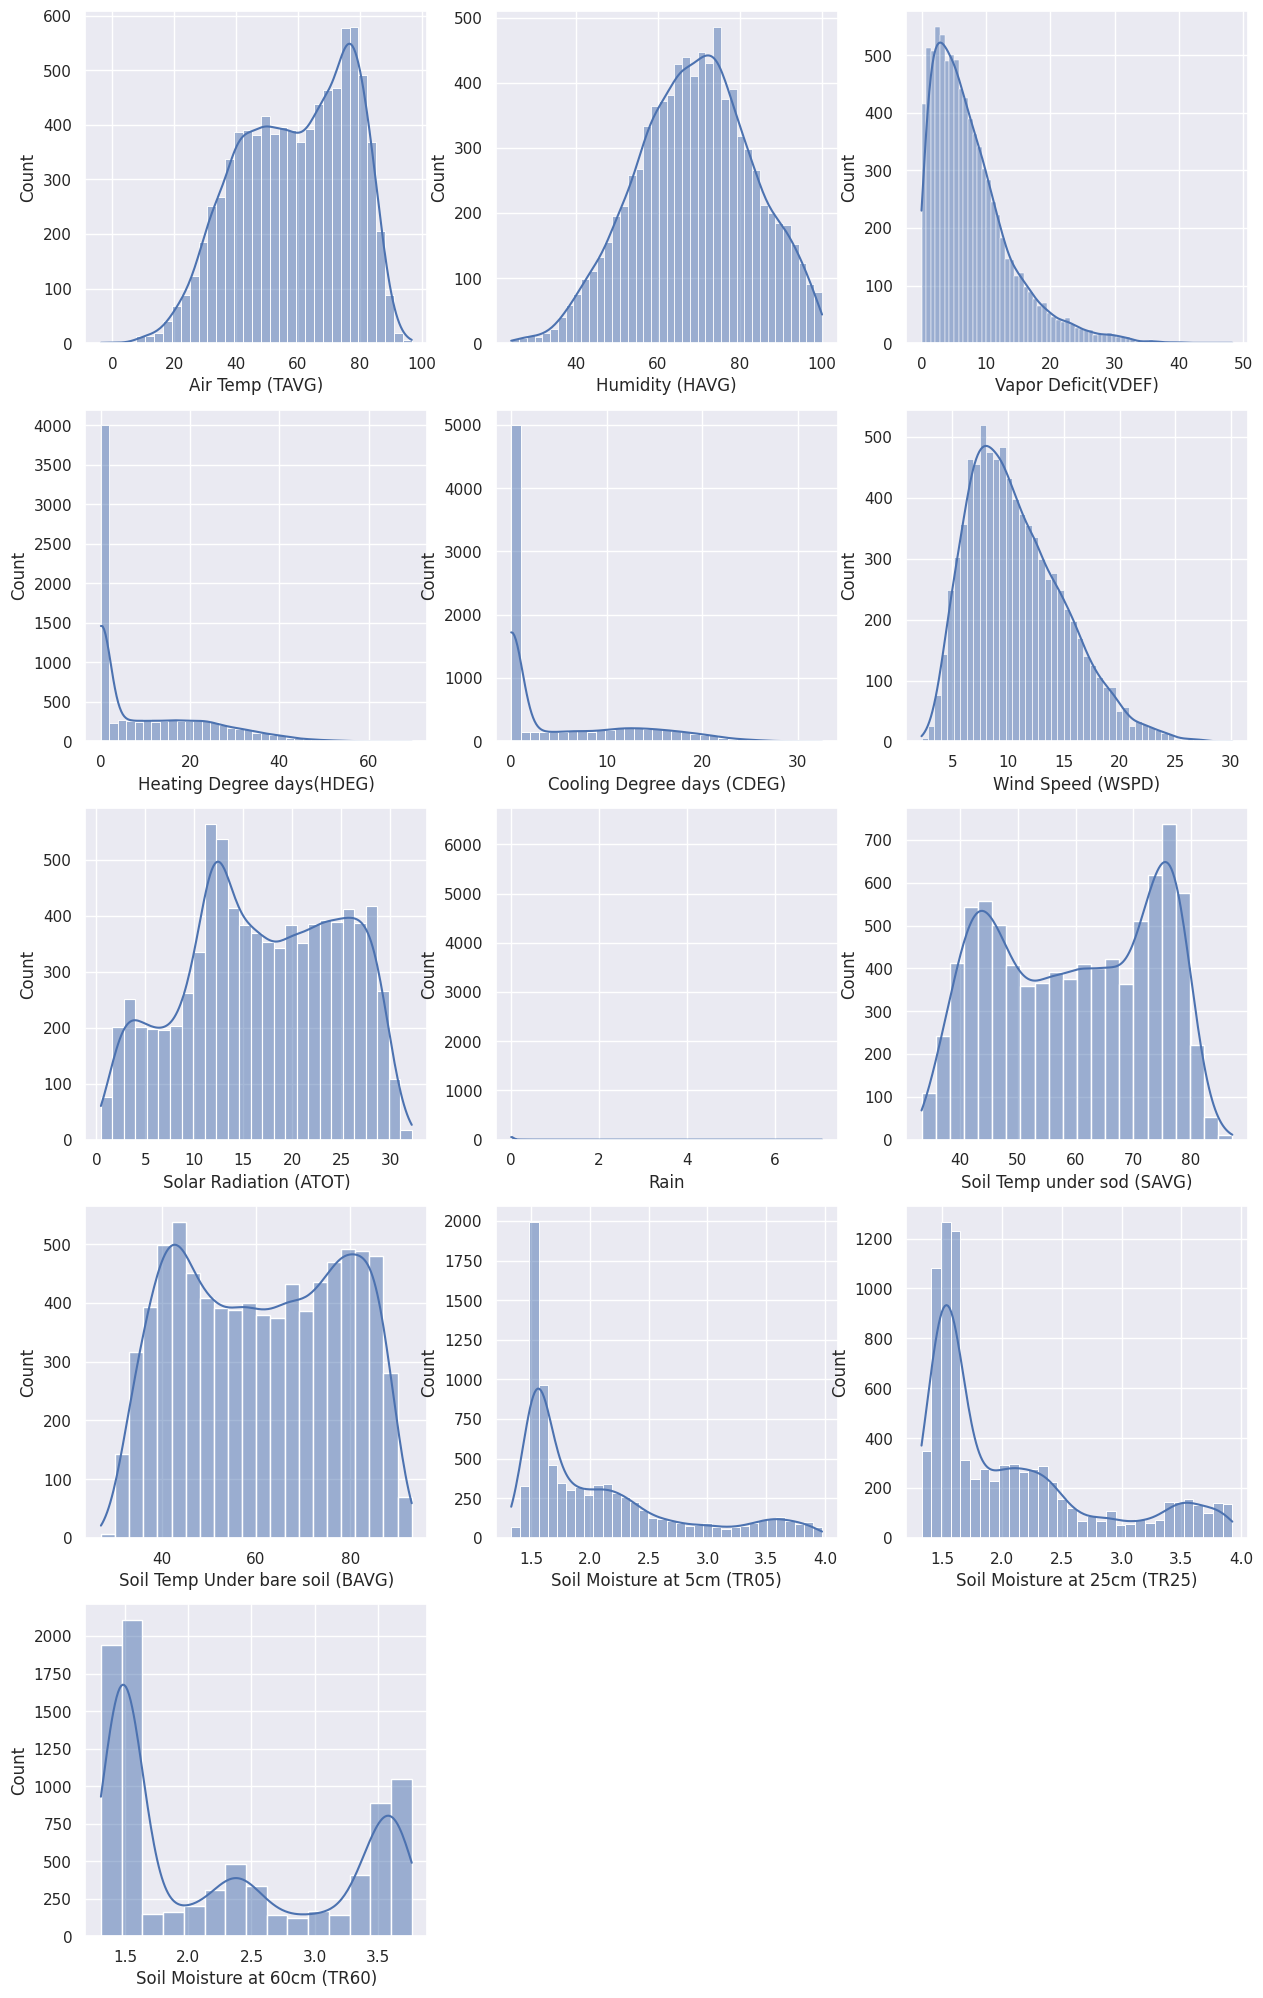

In [ ]:
# Creating histograms for each column to see how data is distributed
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(5, 3, figsize = (15, 25))
plt.rcParams.update({'font.size': 22})

#create boxplot in each subplot
a=sns.histplot(data=df, x='TAVG', kde = True, ax=axes[0,0])
b=sns.histplot(data=df, x='HAVG',kde = True,ax=axes[0,1])
c=sns.histplot(data=df, x='VDEF',kde = True, ax=axes[0,2])
d=sns.histplot(data=df, x='HDEG',kde = True, ax=axes[1,0])
e=sns.histplot(data=df, x='CDEG',kde = True,ax=axes[1,1])
f=sns.histplot(data=df, x='WSPD',kde = True,ax=axes[1,2])
g=sns.histplot(data=df, x='ATOT', kde = True, ax=axes[2,0])
h=sns.histplot(data=df, x='RAIN',kde = True,ax=axes[2,1])
i=sns.histplot(data=df, x='SAVG',kde = True, ax=axes[2,2])
j=sns.histplot(data=df, x='BAVG',kde = True, ax=axes[3,0])
k=sns.histplot(data=df, x='TR05', kde = True,ax=axes[3,1])
l=sns.histplot(data=df, x='TR25', kde = True,ax=axes[3,2])
m=sns.histplot(data=df, x='TR60', kde = True,ax=axes[4,0])

a.set_xlabel( "Air Temp (TAVG)")
b.set_xlabel( "Humidity (HAVG)")
c.set_xlabel( "Vapor Deficit(VDEF)")
d.set_xlabel( "Heating Degree days(HDEG)")
e.set_xlabel( "Cooling Degree days (CDEG)")
f.set_xlabel( "Wind Speed (WSPD)")
g.set_xlabel( "Solar Radiation (ATOT)")
h.set_xlabel( "Rain")
i.set_xlabel( "Soil Temp under sod (SAVG)")
j.set_xlabel( "Soil Temp Under bare soil (BAVG)")
k.set_xlabel( "Soil Moisture at 5cm (TR05)")
l.set_xlabel( "Soil Moisture at 25cm (TR25)")
m.set_xlabel( "Soil Moisture at 60cm (TR60)")


fig.delaxes(axes[4,1])
fig.delaxes(axes[4,2])
# sns.displot(df.TAVG, kde=True)

In [ ]:
# Fill in the missing values using mean and median based imputation
# For columns whose data is highly skewed, median value is imputed
# For columns whose data is normally distributed, mean value is imputed
df['TMAX'] = df['TMAX'].fillna(df['TMAX'].mean())
df['TMIN'] = df['TMIN'].fillna(df['TMIN'].mean())
df['TAVG'] = df['TAVG'].fillna(df['TAVG'].mean())
df['HAVG'] = df['HAVG'].fillna(df['HAVG'].mean())
df['VDEF'] = df['VDEF'].fillna(df['VDEF'].median())
df['HDEG'] = df['HDEG'].fillna(df['HDEG'].median())
df['CDEG'] = df['CDEG'].fillna(df['CDEG'].median())
df['WSPD'] = df['WSPD'].fillna(df['WSPD'].mean())
df['ATOT'] = df['ATOT'].fillna(df['ATOT'].mean())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].median())
df['SAVG'] = df['SAVG'].fillna(df['SAVG'].mean())
df['BAVG'] = df['BAVG'].fillna(df['BAVG'].mean())
df['TR05'] = df['TR05'].fillna(df['TR05'].median())
df['TR25'] = df['TR25'].fillna(df['TR25'].median())
df['TR60'] = df['TR60'].fillna(df['TR60'].mean())

In [ ]:
df

,DATE,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60
0,2000-01-01,69.04,38.58,53.69,60.74,6.76,11.19,0.0,15.82,11.45,0.00,45.16,46.20,1.8101,1.5840,1.5508
1,2000-01-02,60.58,31.12,48.24,58.04,5.47,19.15,0.0,6.21,12.16,0.00,47.04,48.35,1.8401,1.5840,1.5464
2,2000-01-03,55.06,26.92,40.14,86.71,1.39,24.01,0.0,13.38,8.88,0.11,45.64,45.87,1.8145,1.5792,1.5420
3,2000-01-04,44.77,17.64,29.75,64.11,2.28,33.80,0.0,11.32,12.77,0.01,41.85,39.53,1.7812,1.5782,1.5392
4,2000-01-05,53.69,26.63,38.42,48.98,4.76,24.84,0.0,15.63,12.38,0.00,40.03,38.82,1.7900,1.5799,1.5392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8700,2023-10-27,72.72,45.19,54.04,76.54,3.14,6.05,0.0,14.71,11.98,0.00,64.96,64.08,1.5089,1.7333,3.3559
8701,2023-10-28,47.84,35.57,42.12,87.38,1.30,23.29,0.0,12.03,2.31,0.13,60.77,55.27,1.5181,1.6645,3.3526
8702,2023-10-29,36.15,32.26,34.54,90.14,0.68,30.80,0.0,17.69,1.62,0.93,54.15,47.10,1.5173,1.4824,3.3588
8703,2023-10-30,45.31,24.65,33.84,67.66,2.50,30.02,0.0,9.67,15.70,0.00,52.17,45.58,1.5252,1.4387,2.8545


## Importing and Merging EVI and LSWI Data

In [ ]:
file_path_EVI_LSWI = 'Modeling VIs in Tallgrass/data/P13_EVI_LSWI_Data.csv'
df_EVI_LSWI = pd.read_csv(file_path_EVI_LSWI)
df_EVI_LSWI

,Date,8-day pd,EVI,LSWI
0,1/1/2000,1,NaN,NaN
1,1/9/2000,2,NaN,NaN
2,1/17/2000,3,NaN,NaN
3,1/25/2000,4,NaN,NaN
4,2/2/2000,5,NaN,NaN
...,...,...,...,...
1091,9/22/2023,34,0.446,0.163
1092,9/30/2023,35,0.426,0.125
1093,10/8/2023,36,0.401,0.105
1094,10/16/2023,37,0.399,0.131


In [ ]:
# Converting Date column into a datetime format
df_EVI_LSWI['Date'] = pd.to_datetime(df_EVI_LSWI["Date"])
# Sorting the dataframe in ascending order based on dates
df_EVI_LSWI.sort_values(by='Date',ascending=True)

,Date,8-day pd,EVI,LSWI
0,2000-01-01,1,NaN,NaN
1,2000-01-09,2,NaN,NaN
2,2000-01-17,3,NaN,NaN
3,2000-01-25,4,NaN,NaN
4,2000-02-02,5,NaN,NaN
...,...,...,...,...
1091,2023-09-22,34,0.446,0.163
1092,2023-09-30,35,0.426,0.125
1093,2023-10-08,36,0.401,0.105
1094,2023-10-16,37,0.399,0.131


In [ ]:
# Looking for total number of missing values in each column
df_EVI_LSWI.isnull().sum()

Date         0
8-day pd     0
EVI         21
LSWI        21
dtype: int64

In [ ]:
# Appending all the dates into a list
l = df_EVI_LSWI['Date']
len(l)

1096

In [ ]:
# EVI and LSWI data are 8-day composite data. The weather data needs to be transformed into a similar scale.
# So, appending values with in a certain date range into a list for every column in weather dataframe
Dates = []
Tmax = []
Tmin = []
Tavg = []
Havg = []
Vdef = []
Hdeg = []
Cdeg = []
Wspd = []
Atot = []
Rain = []
Savg = []
Bavg = []
Tr05 = []
Tr25 = []
Tr60 = []

for i in range(len(l)-1):
    Dates.append(l[i])
    l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12, l13, l14, l15 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    for j in range(len(df)):
        if df['DATE'][j]>=l[i] and df['DATE'][j]<l[i+1]:
            l1.append(df['TMAX'][j])
            l2.append(df['TMIN'][j])
            l3.append(df['TAVG'][j])
            l4.append(df['HAVG'][j])
            l5.append(df['VDEF'][j])
            l6.append(df['HDEG'][j])
            l7.append(df['CDEG'][j])
            l8.append(df['WSPD'][j])
            l9.append(df['ATOT'][j])
            l10.append(df['RAIN'][j])
            l11.append(df['SAVG'][j])
            l12.append(df['BAVG'][j])
            l13.append(df['TR05'][j])
            l14.append(df['TR25'][j])
            l15.append(df['TR60'][j])
    Tmax.append(l1)
    Tmin.append(l2)
    Tavg.append(l3)
    Havg.append(l4)
    Vdef.append(l5)
    Hdeg.append(l6)
    Cdeg.append(l7)
    Wspd.append(l8)
    Atot.append(l9)
    Rain.append(l10)
    Savg.append(l11)
    Bavg.append(l12)
    Tr05.append(l13)
    Tr25.append(l14)
    Tr60.append(l15)

In [ ]:
mod = df_EVI_LSWI['EVI']
mod2 = df_EVI_LSWI['LSWI']

In [ ]:
# Creating a new dataframe and assigning all the above created lists
data = pd.DataFrame(list(zip(Dates, Tmax,Tmin,Tavg,Havg,Vdef,Hdeg,Cdeg,Wspd,Atot,Rain,Savg,Bavg,Tr05,Tr25,Tr60,l,mod,mod2)),
                    columns = ['DATE', 'TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'Date', 'MODIS_EVI', 'LSWI'])

In [ ]:
# Any null values?
data[data.isnull().any(axis=1)]

,DATE,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,RAIN,SAVG,BAVG,TR05,TR25,TR60,Date,MODIS_EVI,LSWI
0,2000-01-01,"[69.04, 60.58, 55.06, 44.77, 53.69, 53.6, 54.6...","[38.58, 31.12, 26.92, 17.64, 26.63, 22.12, 20....","[53.69, 48.24, 40.14, 29.75, 38.42, 35.21, 37....","[60.74, 58.04, 86.71, 64.11, 48.98, 72.81, 74....","[6.76, 5.47, 1.39, 2.28, 4.76, 2.59, 2.79, 0.55]","[11.19, 19.15, 24.01, 33.8, 24.84, 27.14, 27.5...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[15.82, 6.21, 13.38, 11.32, 15.63, 8.24, 6.1, ...","[11.45, 12.16, 8.88, 12.77, 12.38, 12.15, 12.3...","[0.0, 0.0, 0.11, 0.01, 0.0, 0.0, 0.0, 0.13]","[45.16, 47.04, 45.64, 41.85, 40.03, 40.08, 40....","[46.2, 48.35, 45.87, 39.53, 38.82, 39.62, 40.0...","[1.8101, 1.8401, 1.8145, 1.7812, 1.79, 1.8021,...","[1.584, 1.584, 1.5792, 1.5782, 1.5799, 1.5804,...","[1.5508, 1.5464, 1.542, 1.5392, 1.5392, 1.5388...",2000-01-01,NaN,NaN
1,2000-01-09,"[53.76, 64.9, 58.96, 67.06, 51.6, 57.02, 66.96...","[30.67, 31.75, 23.79, 36.19, 26.2, 18.6, 39.46...","[40.52, 45.12, 40.03, 49.6, 38.84, 37.8, 52.99...","[72.6, 47.59, 61.89, 50.57, 54.71, 55.86, 57.6...","[2.87, 6.31, 4.33, 7.12, 4.01, 4.74, 5.83, 6.24]","[22.78, 16.67, 23.62, 13.38, 26.1, 27.19, 11.7...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[9.52, 10.57, 6.0, 11.16, 8.95, 11.53, 16.25, ...","[12.71, 10.54, 12.82, 12.71, 12.94, 12.3, 8.21...","[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[43.3, 41.89, 42.26, 43.4, 43.03, 40.74, 43.75...","[42.74, 41.25, 42.07, 43.66, 43.37, 40.56, 44....","[1.5944, 1.6242, 1.6601, 1.7039, 1.7618, 1.811...","[1.5828, 1.5827, 1.5842, 1.587, 1.5826, 1.5824...","[1.5367, 1.5356, 1.5333, 1.5352, 1.531, 1.5295...",2000-01-09,NaN,NaN
2,2000-01-17,"[46.6, 49.73, 67.21, 42.07, 52.61, 55.6, 56.01...","[39.24, 31.7, 34.6, 20.64, 26.42, 27.18, 21.77...","[42.28, 39.26, 47.49, 31.45, 39.38, 40.46, 37....","[68.98411404117512, 88.45, 69.14, 56.97, 53.73...","[6.24, 1.2, 4.73, 2.84, 4.26, 3.16, 2.3, 2.19]","[22.08, 24.29, 14.09, 33.64, 25.48, 23.61, 26....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[5.92, 6.24, 10.99, 7.93, 12.23, 7.33, 9.8, 7.01]","[2.91, 8.68, 9.85, 12.88, 10.73, 12.07, 12.26,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[45.91, 45.27, 46.06, 44.05, 42.8, 43.48, 43.5...","[45.69, 44.91, 46.02, 43.69, 42.31, 43.49, 43....","[1.8284, 1.8382, 1.8586, 1.9097, 1.9529, 1.984...","[1.5852, 1.5875, 1.5919, 1.5881, 1.5921, 1.596...","[1.5283, 1.5274, 1.5306, 1.5253, 1.5291, 1.531...",2000-01-17,NaN,NaN
3,2000-01-25,"[37.3, 30.43, 28.75, 25.32, 33.34, 36.72, 40.6...","[25.71, 24.87, 21.9, 20.87, 11.34, 13.5, 11.05...","[31.2, 26.93, 25.39, 22.61, 21.06, 24.5, 23.8,...","[58.57, 86.07, 99.74, 95.9, 86.97, 87.2, 96.09...","[2.54, 0.78, 0.01, 0.17, 0.63, 0.74, 0.2, 0.03]","[33.5, 37.35, 39.67, 41.91, 42.66, 39.89, 39.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[11.04, 7.75, 6.81, 5.28, 3.72, 3.29, 3.83, 5.98]","[11.47, 3.65, 6.43, 8.03, 15.29, 14.18, 12.74,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28, 0.0]","[40.41, 39.5, 39.1, 38.52, 38.13, 37.64, 37.0,...","[39.79, 38.16, 36.55, 35.8, 35.41, 35.21, 35.0...","[2.0619, 2.0725, 2.0093, 1.7535, 1.5988, 1.579...","[1.5946, 1.5951, 1.5964, 1.6024, 1.5973, 1.596...","[1.5238, 1.5251, 1.5265, 1.5276, 1.5249, 1.527...",2000-01-25,NaN,NaN
4,2000-02-02,"[51.76, 55.22, 43.69, 48.0, 57.81, 63.05, 66.4...","[19.43, 31.68, 19.55, 16.3, 30.33, 28.44, 26.7...","[34.16, 43.16, 34.43, 32.62, 41.32, 43.16, 46....","[80.43, 64.57, 67.1, 71.47, 66.75, 66.54, 60.5...","[2.04, 3.79, 2.57, 2.45, 3.77, 4.82, 6.17, 10.08]","[29.4, 21.55, 33.38, 32.85, 20.93, 19.26, 18.3...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[9.29, 12.0, 11.79, 9.14, 8.81, 7.74, 8.87, 16...","[15.08, 16.989076630176108, 15.8, 14.72, 11.71...","[0.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[36.54, 39.4, 39.27, 37.84, 39.75, 41.47, 42.6...","[36.34, 39.76, 38.97, 36.96, 38.92, 41.55, 43....","[1.5431, 1.8181, 1.5421, 1.5538, 1.5612, 1.566...","[1.5935, 1.7398500000000001, 1.5896, 1.5885, 1...","

In [ ]:
# Looking for any NaN values in the dataset
data.isnull().sum()

DATE          0
TMAX          0
TMIN          0
TAVG          0
HAVG          0
VDEF          0
HDEG          0
CDEG          0
WSPD          0
ATOT          0
RAIN          0
SAVG          0
BAVG          0
TR05          0
TR25          0
TR60          0
Date          0
MODIS_EVI    20
LSWI         20
dtype: int64

In [ ]:
# Dropping the rows with NaN values
data = data.dropna()

In [ ]:
# Looking for any NaN values in the dataset
data.isnull().sum()

DATE         0
TMAX         0
TMIN         0
TAVG         0
HAVG         0
VDEF         0
HDEG         0
CDEG         0
WSPD         0
ATOT         0
RAIN         0
SAVG         0
BAVG         0
TR05         0
TR25         0
TR60         0
Date         0
MODIS_EVI    0
LSWI         0
dtype: int64

In [ ]:
len(data)

1075

In [ ]:
 # Summing up rain and average for remaining attributes for every list in each row for all the weather attributes
import numpy as np
data['Tmax_mean'] = data['TMAX'].apply(np.mean)
data['Tmin_mean'] = data['TMIN'].apply(np.mean)
data['Tavg_mean'] = data['TAVG'].apply(np.mean)
data['Havg_mean'] = data['HAVG'].apply(np.mean)
data['Vdef_mean'] = data['VDEF'].apply(np.mean)
data['Hdeg_mean'] = data['HDEG'].apply(np.mean)
data['Cdeg_mean'] = data['CDEG'].apply(np.mean)
data['Wspd_mean'] = data['WSPD'].apply(np.mean)
data['Atot_mean'] = data['ATOT'].apply(np.mean)
data['Rain_sum'] = data['RAIN'].apply(np.sum)
data['Savg_mean'] = data['SAVG'].apply(np.mean)
data['Bavg_mean'] = data['BAVG'].apply(np.mean)
data['Tr05_mean'] = data['TR05'].apply(np.mean)
data['Tr25_mean'] = data['TR25'].apply(np.mean)
data['Tr60_mean'] = data['TR60'].apply(np.mean)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/

In [ ]:
data

,DATE,TMAX,TMIN,TAVG,HAVG,VDEF,HDEG,CDEG,WSPD,ATOT,...,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean
6,2000-02-18,"[64.42, 50.34, 62.1, 69.71, 68.67, 71.15, 74.9...","[33.2, 27.7, 23.98, 46.28, 52.0, 46.4, 42.07, ...","[41.05, 36.51, 45.21, 58.62, 59.82, 57.07, 60....","[76.88, 75.42, 64.41, 61.23, 91.37, 74.45, 74....","[1.95, 2.18, 5.32, 6.77, 1.7, 4.81, 5.28, 7.67]","[16.19, 25.98, 21.96, 7.0, 4.67, 6.22, 6.51, 8...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[16.76, 5.27, 8.83, 16.38, 19.15, 14.72, 17.09...","[6.46, 15.68, 15.87, 13.73, 4.33, 14.63, 16.52...",...,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100
7,2000-02-26,"[55.96, 68.02, 70.77, 71.71, 67.91, 54.39, 44....","[31.1, 27.86, 42.04, 45.37, 28.74, 43.46, 30.7...","[45.52, 48.1, 56.04, 57.93, 49.7, 48.22, 39.74...","[53.84, 58.64, 52.1, 58.62, 59.65, 81.3, 91.27...","[5.21, 6.75, 8.6, 7.83, 7.0, 2.28, 0.8, 3.57]","[21.47, 17.06, 8.59, 6.46, 16.67, 16.08, 27.27...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[11.03, 9.11, 18.23, 20.07, 7.17, 14.09, 13.23...","[14.47, 19.79, 16.97, 16.989076630176108, 19.7...",...,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671737,1.570663,1.491400
8,2000-03-05,"[67.69, 76.42, 71.78, 69.71, 53.28, 49.66, 49....","[38.43, 49.1, 53.2, 47.97, 35.75, 30.7, 29.64,...","[52.93, 61.89, 62.5, 57.26, 44.44, 39.45, 38.2...","[68.02, 78.24, 89.87, 52.47, 69.49, 80.99, 74....","[5.44, 4.93, 2.3, 8.47, 3.27, 1.83, 2.58, 4.09]","[11.94, 2.24, 2.51, 6.16, 20.49, 24.82, 25.26,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[14.13, 15.14, 17.34, 15.34, 9.88, 14.09, 10.9...","[18.74, 16.64, 8.94, 21.58, 20.93, 12.03, 21.7...",...,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662
9,2000-03-13,"[66.76, 62.13, 73.18, 51.91, 44.02, 47.59, 60....","[32.01, 48.45, 49.51, 30.63, 31.91, 39.43, 37....","[49.88, 54.24, 61.14, 35.6, 38.9, 42.18, 46.12...","[74.63, 81.04, 80.96, 99.84, 99.32, 91.32, 67....","[4.18, 2.9, 4.41, 0.01, 0.06, 0.85, 4.29, 8.43]","[15.62, 9.71, 3.65, 23.73, 27.03, 21.49, 16.12...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[5.96, 10.92, 13.65, 12.53, 4.99, 8.9, 11.1, 1...","[17.75, 7.06, 19.55, 1.95, 3.44, 5.66, 23.28, ...",...,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650
10,2000-03-21,"[57.58, 55.62, 66.2, 76.1, 74.82, 81.27, 72.0,...","[49.82, 48.36, 52.21, 44.16, 46.11, 47.53, 41....","[53.34, 51.67, 58.54, 59.33, 60.24, 63.33, 58....","[78.29, 99.01, 82.23, 73.54, 78.15, 75.4, 60.0...","[3.11, 0.12, 3.32, 6.46, 5.13, 6.63, 8.14, 8.33]","[11.3, 13.01, 5.79, 4.87, 4.54, 0.6, 8.24, 7.41]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[10.07, 9.54, 17.45, 6.96, 6.65, 8.01, 9.23, 1...","[3.52, 2.42, 11.54, 24.14, 23.53, 22.29, 24.74...",...,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-09-14,"[72.55, 76.46, 77.67, 87.51, 89.49, 87.04, 86....","[65.68, 61.25, 55.47, 52.63, 59.76, 64.76, 63....","[68.28, 68.23, 67.31, 69.38, 74.64, 74.21, 75....","[87.94, 80.73, 82.73, 68.41, 51.67, 64.88, 70....","[2.95, 4.92, 4.76, 11.35, 16.59, 10.94, 10.14,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[4.12, 3.86, 1.57, 5.07, 9.62, 10.9, 10.37, 10...","[7.02, 5.08, 5.45, 5.04, 10.0, 15.53, 10.02, 1...","[7.65, 8.34, 14.78, 21.47, 21.03, 17.93, 19.97...",...,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537
1091,2023-09-22,"[92.12, 95.0, 85.14, 88.45, 90.14, 91.67, 91.6...","[66.96, 69.8, 62.87, 58.53, 53.91, 59.38, 63.9...","[76.63, 80.08, 73.82, 71.37, 72.93, 74.63, 76....","[76.11, 69.64, 81.86, 70.95, 56.39, 57.79, 57....","[9.01, 13.01, 5.92, 10.37, 15.61, 15.17, 15.84...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[14.54, 17.4, 9.0, 8.49, 7.02, 10.52, 12.78, 1...","[13.92, 11.71, 9.07, 5.23

In [ ]:
df.columns

Index(['DATE', 'TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60'],
      dtype='object')

In [ ]:
# Dropping the unwanted columns
data = data.drop(['TMAX', 'TMIN', 'TAVG', 'HAVG', 'VDEF', 'HDEG', 'CDEG', 'WSPD',
       'ATOT', 'RAIN', 'SAVG', 'BAVG', 'TR05', 'TR25', 'TR60', 'Date'], axis = 1)

In [ ]:
data

,DATE,MODIS_EVI,LSWI,Tmax_mean,Tmin_mean,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean
6,2000-02-18,0.254,-0.111,65.97125,39.69625,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100
7,2000-02-26,0.211,-0.136,62.06000,34.60125,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671737,1.570663,1.491400
8,2000-03-05,0.231,-0.092,62.40375,39.08125,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662
9,2000-03-13,0.170,-0.205,59.99875,38.34750,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650
10,2000-03-21,0.187,-0.206,69.18500,46.87375,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-09-14,0.379,0.084,82.81875,61.12750,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537
1091,2023-09-22,0.446,0.163,90.86500,62.67125,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688
1092,2023-09-30,0.426,0.125,81.99625,57.50625,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813213,2.058113,3.441438
1093,2023-10-08,0.401,0.105,76.04875,48.93750,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664288,3.413925


In [ ]:
# Arranging the columns
data = data[['DATE','Tmax_mean', 'Tmin_mean', 'Tavg_mean', 'Havg_mean',
       'Vdef_mean', 'Hdeg_mean', 'Cdeg_mean', 'Wspd_mean', 'Atot_mean',
       'Rain_sum', 'Savg_mean', 'Bavg_mean', 'Tr05_mean', 'Tr25_mean',
       'Tr60_mean', 'MODIS_EVI', 'LSWI']]

In [ ]:
data

,DATE,Tmax_mean,Tmin_mean,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
6,2000-02-18,65.97125,39.69625,52.10875,71.93625,4.46000,12.16500,0.00000,14.49375,13.258750,1.06,50.37625,50.81500,1.863600,1.581400,1.504100,0.254,-0.111
7,2000-02-26,62.06000,34.60125,48.71250,66.61750,5.25500,16.66875,0.00000,12.51125,14.832385,0.78,49.21875,49.43125,1.671737,1.570663,1.491400,0.211,-0.136
8,2000-03-05,62.40375,39.08125,50.03750,72.90625,4.11375,14.25750,0.00000,13.49750,17.770000,0.71,51.34375,51.30125,1.562450,1.557400,1.478662,0.231,-0.092
9,2000-03-13,59.99875,38.34750,47.88250,81.58250,3.14125,15.82625,0.00000,10.42750,12.791250,0.95,50.05750,49.97750,1.594888,1.547525,1.471650,0.170,-0.205
10,2000-03-21,69.18500,46.87375,57.95000,75.16625,5.15500,6.97000,0.00000,10.11750,16.667500,2.39,56.53125,56.36875,1.507513,1.531750,1.465475,0.187,-0.206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2023-09-14,82.81875,61.12750,71.42375,73.00250,8.62500,0.00000,6.97375,8.59875,15.427500,0.99,71.31000,71.28000,1.520763,3.208450,3.473537,0.379,0.084
1091,2023-09-22,90.86500,62.67125,75.57250,66.09000,12.62500,0.00000,11.76625,9.57000,18.105000,0.39,72.30125,75.01625,1.620875,2.699000,3.452688,0.446,0.163
1092,2023-09-30,81.99625,57.50625,68.66625,63.53250,10.45000,2.35625,7.10750,8.96625,15.098750,1.52,69.67000,72.41000,1.813213,2.058113,3.441438,0.426,0.125
1093,2023-10-08,76.04875,48.93750,61.79500,65.17125,7.83500,4.42000,1.91250,12.27000,15.991250,0.00,64.46500,64.92125,1.711912,1.664288,3.413925,0.401,0.105


In [ ]:
# Dropping Tmax and Tmin by considering Tavg
data = data.drop(['Tmax_mean', 'Tmin_mean'], axis = 1)

In [ ]:
data = data[np.isfinite(data).all(1)]

# Save Clean Dataset

In [ ]:
# Write cleaned data to csv
data.to_csv('Modeling VIs in Tallgrass/data/P13_Cleaned_Data.csv')

In [ ]:
data.describe()

,Tavg_mean,Havg_mean,Vdef_mean,Hdeg_mean,Cdeg_mean,Wspd_mean,Atot_mean,Rain_sum,Savg_mean,Bavg_mean,Tr05_mean,Tr25_mean,Tr60_mean,MODIS_EVI,LSWI
count,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,59.165796,68.980067,7.742864,10.553386,5.003759,10.769028,16.981429,0.707551,59.800063,61.390399,2.086012,2.069271,2.293683,0.308986,-0.030731
std,16.679821,10.073605,5.452989,11.556871,6.529043,2.295833,6.051289,1.101388,13.515565,16.053672,0.631037,0.698045,0.882379,0.135496,0.171213
min,8.612500,32.486250,0.220000,0.000000,0.000000,4.857500,2.581250,0.000000,34.682500,30.437500,1.344363,1.327800,1.313862,-0.085000,-1.370000
25%,45.185000,62.684687,3.926250,0.000000,0.000000,9.125312,11.598750,0.010000,46.724063,46.416562,1.590909,1.546663,1.483628,0.194000,-0.159000
50%,60.040000,69.811250,6.302500,5.835000,1.093125,10.701250,17.012606,0.270000,60.002500,61.362889,1.836113,1.754675,1.985356,0.277000,-0.054000
75%,74.753438,75.908438,10.155000,19.521687,10.366563,12.307782,22.223096,0.930000,72.735938,75.805312,2.360844,2.364122,3.357103,0.423750,0.099000
max,92.728750,97.525000,40.068750,56.708750,27.852500,19.828750,29.428750,8.570000,85.607500,91.628750,3.949313,3.916762,3.760875,0.664000,1.003000


In [ ]:
# End of code 1/25/24